2022-01-01    0.000195
2023-01-01    0.000235
2024-01-01    0.000245
2025-01-01    0.000251
2026-01-01    0.000256
2027-01-01    0.000261
2028-01-01    0.000267
dtype: float64
2022-01-01    0.000194
2023-01-01    0.000234
2024-01-01    0.000244
2025-01-01    0.000250
2026-01-01    0.000254
2027-01-01    0.000260
2028-01-01    0.000266
dtype: float64
            NY.GDP.MKTP.CD
year                      
2022-01-01        0.000194
2021-01-01        0.000143
2020-01-01        0.000148
2019-01-01        0.000155
2018-01-01        0.000144
2017-01-01        0.000142
2016-01-01        0.000138
2015-01-01        0.000140
2014-01-01        0.000146
2013-01-01        0.000143
2012-01-01        0.000141
2011-01-01        0.000137
2010-01-01        0.000139
2009-01-01        0.000142
2008-01-01        0.000182
2007-01-01        0.000158
2006-01-01        0.000123
2005-01-01        0.000103
2004-01-01        0.000081
2003-01-01        0.000072
2002-01-01        0.000068
2001-01-01        0.000063


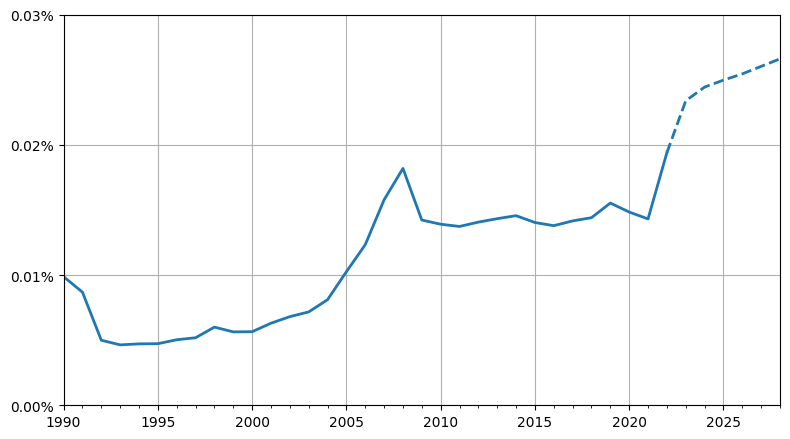

In [4]:
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from pandas_datareader import wb
from datetime import date

plt.rcParams['figure.figsize'] = (8, 4.5)

data = wb.download(indicator='NY.GDP.MKTP.CD', country=['AM', '1W'], start=1990, end=date.today().year, errors='ignore')
ratio = data.loc['Armenia'] / data.loc['World']
ratio.index = pd.to_datetime(ratio.index)

# now get IMF data based on https://www.imf.org/en/Publications/WEO/weo-database/2023/October
# By Countries -> Middle East and Central Asia -> Armenia -> Gross domestic product, current prices U.S. DOLLARS -> prepare report
imf_data = pd.Series({
    '2022-01-01': 19.514 / 100135.361,
    '2023-01-01': 24.540 / 104476.432,
    '2024-01-01': 26.935 / 109734.270,
    '2025-01-01': 28.996 / 115598.839,
    '2026-01-01': 31.081 / 121580.994,
    '2027-01-01': 33.335 / 127499.667,
    '2028-01-01': 35.752 / 133782.888
})
imf_data.index = pd.to_datetime(imf_data.index)
print(imf_data)
# now align with WB data
imf_data2 = imf_data * ratio.iloc[0, 0] / imf_data.iloc[0]
print(imf_data2)
print(ratio)

ax = ratio.dropna().plot(legend=0, grid=1, lw=2);
imf_data2.plot(style='--', color='C0', grid=1, lw=2);
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=2))
ax.set_ylim(bottom = 0, top=0.0003);
ax.set_yticks([0, 0.0001, 0.0002, 0.0003]);
ax.xaxis.set_label_text("")
plt.tight_layout()
plt.savefig('հնա.svg')

In [5]:
# the file was downloaded from https://population.un.org/wpp/Download/Standard/CSV/
population = pd.read_csv("WPP2022_Population1JanuaryByAge5GroupSex_Medium.csv")

/tmp/ipykernel_2741/3848041875.py:2: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  population = pd.read_csv("WPP2022_Population1JanuaryByAge5GroupSex_Medium.csv")


In [6]:
regions = ["World", "Armenia"]
start_date = 1990
end_date = 2101
years = range(start_date, end_date)
age_groups = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64"]
working_population = pd.DataFrame(index=years, columns=regions, dtype=float)

In [7]:
for region in regions:
    for year in years:
        region_sum = 0
        tmp = population[(population["Location"] == region) & (population["Time"] == year)]
        for age_group in age_groups:
            region_sum += tmp[tmp["AgeGrp"] == age_group]["PopTotal"].iloc[0]
        working_population.loc[year, region] = region_sum

In [8]:
working_population

World   Armenia
1990  3212426.760  2281.654
1991  3272708.455  2309.521
1992  3331680.322  2337.534
1993  3388276.473  2214.163
1994  3445166.144  2141.434
...           ...       ...
2096  6204648.791   881.955
2097  6195582.122   871.874
2098  6185639.874   861.609
2099  6174849.404   851.221
2100  6163179.668   840.691

[111 rows x 2 columns]

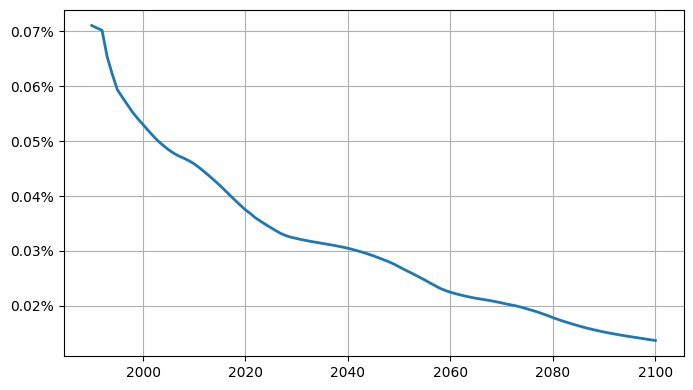

In [10]:
pop_ratio = working_population["Armenia"].div(working_population["World"])
ax = pop_ratio.dropna().plot(legend=0, grid=1, lw=2);
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=2))

In [11]:
pop_ratio

1990    0.000710
1991    0.000706
1992    0.000702
1993    0.000653
1994    0.000622
          ...   
2096    0.000142
2097    0.000141
2098    0.000139
2099    0.000138
2100    0.000136
Length: 111, dtype: float64

In [12]:
ratio

NY.GDP.MKTP.CD
year                      
2022-01-01        0.000194
2021-01-01        0.000143
2020-01-01        0.000148
2019-01-01        0.000155
2018-01-01        0.000144
2017-01-01        0.000142
2016-01-01        0.000138
2015-01-01        0.000140
2014-01-01        0.000146
2013-01-01        0.000143
2012-01-01        0.000141
2011-01-01        0.000137
2010-01-01        0.000139
2009-01-01        0.000142
2008-01-01        0.000182
2007-01-01        0.000158
2006-01-01        0.000123
2005-01-01        0.000103
2004-01-01        0.000081
2003-01-01        0.000072
2002-01-01        0.000068
2001-01-01        0.000063
2000-01-01        0.000056
1999-01-01        0.000056
1998-01-01        0.000060
1997-01-01        0.000052
1996-01-01        0.000050
1995-01-01        0.000047
1994-01-01        0.000047
1993-01-01        0.000046
1992-01-01        0.000050
1991-01-01        0.000087
1990-01-01        0.000099

In [13]:
imf_data2.name = "imf"

In [14]:
combined_gdp = pd.concat([imf_data2.iloc[::-1][:-1], ratio.iloc[:, 0]])

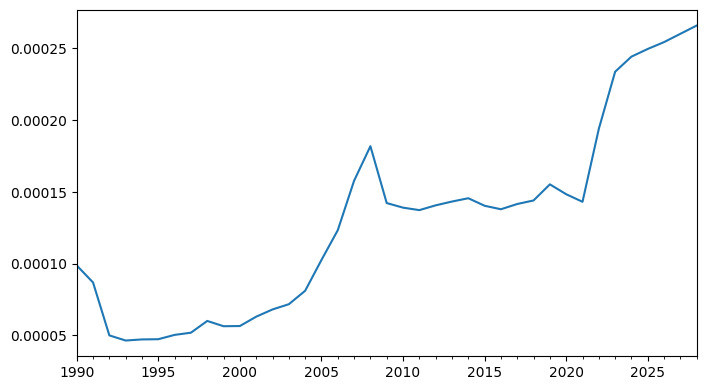

In [15]:
combined_gdp.plot();

In [16]:
combined_gdp.index = combined_gdp.index.year

In [17]:
productivity = combined_gdp.div(pop_ratio)
productivity

1990    0.138987
1991    0.123062
1992    0.071188
1993    0.070962
1994    0.075838
          ...   
2096         NaN
2097         NaN
2098         NaN
2099         NaN
2100         NaN
Length: 111, dtype: float64

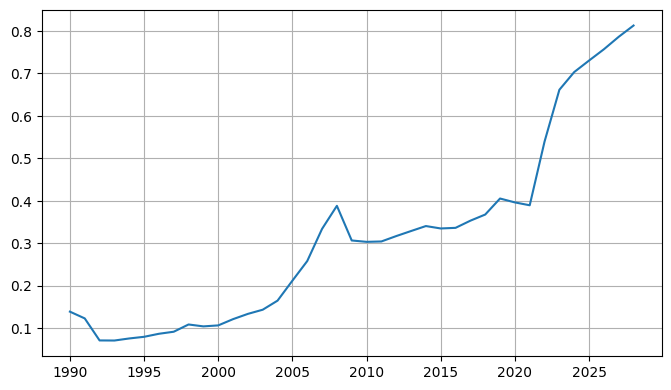

In [18]:
productivity.plot(grid=1);

In [19]:
last_year = productivity.dropna().index[-1]

In [20]:
half_life = 20
half_life_factor = pd.Series(np.power(0.5, (productivity.index - 2028)/half_life), index=productivity.index)

In [21]:
half_life_factor.loc[2028:2068]

2028    1.000000
2029    0.965936
2030    0.933033
2031    0.901250
2032    0.870551
2033    0.840896
2034    0.812252
2035    0.784584
2036    0.757858
2037    0.732043
2038    0.707107
2039    0.683020
2040    0.659754
2041    0.637280
2042    0.615572
2043    0.594604
2044    0.574349
2045    0.554785
2046    0.535887
2047    0.517632
2048    0.500000
2049    0.482968
2050    0.466516
2051    0.450625
2052    0.435275
2053    0.420448
2054    0.406126
2055    0.392292
2056    0.378929
2057    0.366021
2058    0.353553
2059    0.341510
2060    0.329877
2061    0.318640
2062    0.307786
2063    0.297302
2064    0.287175
2065    0.277392
2066    0.267943
2067    0.258816
2068    0.250000
dtype: float64

In [22]:
target_productivity = 1.0
productivity_copy = productivity.copy()
productivity_copy.loc[2028:] = (target_productivity - (target_productivity - productivity[last_year])*half_life_factor).loc[2028:]

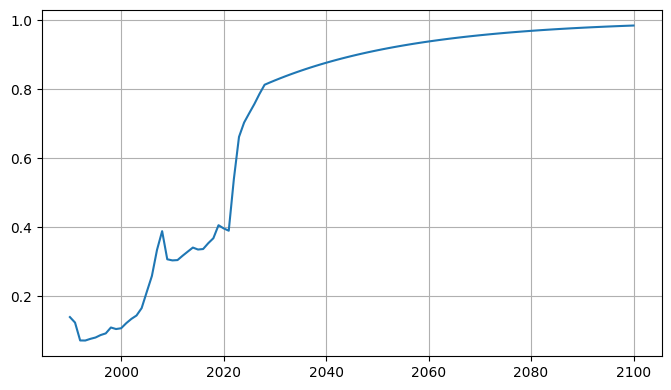

In [23]:
productivity_copy.plot(grid=1);

In [24]:
new_gdp_ratio = productivity_copy.mul(pop_ratio)

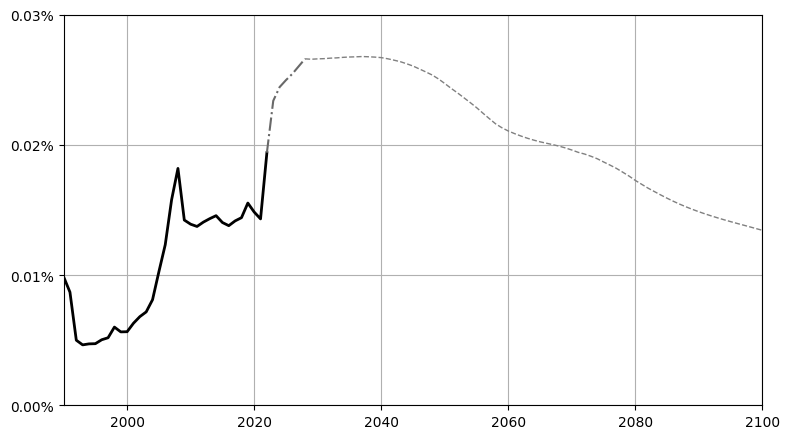

In [41]:
ax = new_gdp_ratio.loc[:2022].plot(legend=0, grid=1, lw=2, color="black");
new_gdp_ratio.loc[2022:2028].plot(style='-.', color='dimgray', grid=1, lw=1.5);
new_gdp_ratio.loc[2028:].plot(style='--', color='gray', grid=1, lw=1);
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=2))
ax.set_ylim(bottom = 0, top=0.0003);
ax.set_xlim(left = 1990, right=2100);
ax.set_yticks([0, 0.0001, 0.0002, 0.0003]);
ax.xaxis.set_label_text("")
plt.tight_layout()
plt.savefig('հնա2.svg')